## Predicting Images Categories with CNN: CIFAR-10 Dataset
### Problem:
- **Objective**: Predict category for CIFAR-10 dataset images into 10 different classes.
- **How**: Building a Convolutional Neural Network for Multi-Class Classification.
- **Dataset**: 60.000 color images 32x32 pixels of different categories (e.g., airplanes, cars, cats, dogs, etc.) (CIFAR-10 Dataset)
- **Target variable**: Category for the image

### Steps:
**Load the Dataset**: CIFAR-10 dataset from Torchvision ([Link Here](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html))

**Preprocess the Data**:
  1) Define transform for preprocessing the data (normalizing pixel values between 0 and 1)
  2) Load the train CIFAR-10 dataset
  3) Load the test CIFAR-10 dataset
  4) Create DataLoaders for train and test sets

**Build the Neural Network**: Convolutional Neural Network with the following layers:

*Convolutional Layers*: Each convolutional layer uses a 3x3 kernel to extract features. The number of filters (32 and 64) increases as we go deeper into the network.

*Max Pooling Layers*: Max-pooling layers reduce the size of the feature maps (2x2 window), keeping the most important information.

*Fully Connected Layers*: After flattening the 3D output from the convolutional layers, the fully connected layers are used to classify the image into one of the 10 classes.

**Train the Model**: 
 1) Use the Cross Entropy loss function and Adam optimizer. 
 2) Train for 10 epochs.
 3) Calculate and print the train loss during training.

**Evaluate the Model**:  
 1) Calculate test loss after training.
 2) Plot training loss curve
 3) Calculate R-squared
 4) Plot Confusion Matrix

In [3]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [4]:
image, label = train_dataset[0]
print(f'Image shape: {image.shape}, Label: {label}')

Image shape: torch.Size([3, 32, 32]), Label: 6


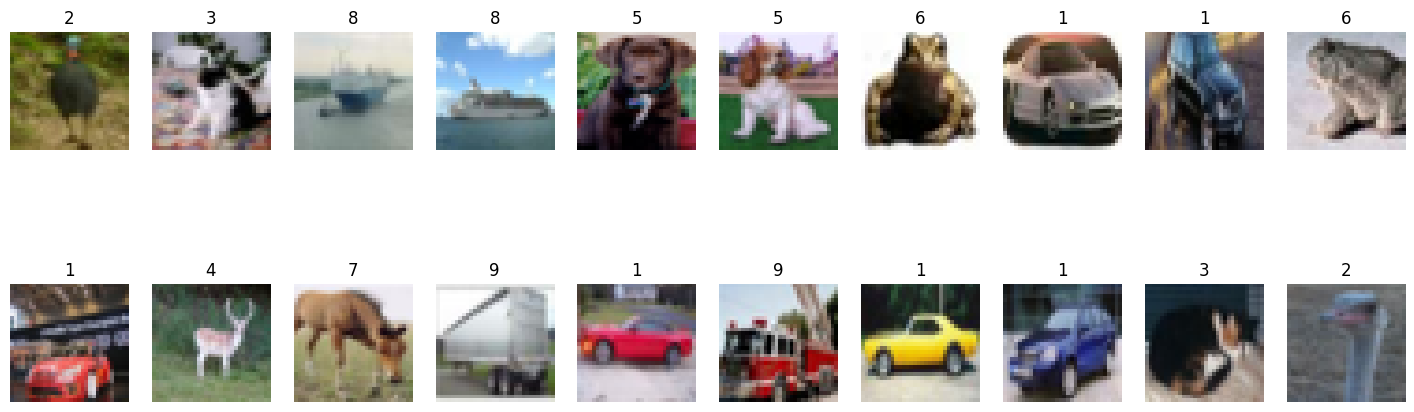

In [5]:
# Plot CIFAR-10 images
figure = plt.figure(figsize=(18, 6))
cols, rows = 10, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    
    # Denormalize the image for proper visualization
    img = img * 0.5 + 0.5  # Reverse the normalization (0.5 mean, 0.5 std)
    
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    
    # Convert from Tensor to NumPy and transpose the channels (C, H, W) -> (H, W, C)
    plt.imshow(img.permute(1, 2, 0))  # For RGB images, no need to use cmap="gray"
    
plt.show()

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)  # First conv layer (32 filters)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Second conv layer (64 filters)
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer (2x2 window)

        # Define fully connected layers
        self.fc1 = nn.Linear(32 * 8 * 8, 512)  # 64 feature maps of size 8x8
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)  # 10 classes

    def forward(self, x):
        # Apply convolutional layers with ReLU and pooling
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))

        # Flatten the output from the conv layers
        x = x.view(-1, 32 * 8 * 8)

        # Apply fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [24]:
model = CNN()

In [7]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

NameError: name 'model' is not defined

In [9]:
epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()

        pred = model(images)
        loss_fn = loss(pred, labels)

        loss_fn.backward()
        optimizer.step()

        running_loss += loss_fn.item()
        #print(running_loss)
    # Print the average loss after each epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/10, Loss: 1.2958
Epoch 2/10, Loss: 0.9015
Epoch 3/10, Loss: 0.7180
Epoch 4/10, Loss: 0.5583
Epoch 5/10, Loss: 0.4097
Epoch 6/10, Loss: 0.2767
Epoch 7/10, Loss: 0.1661
Epoch 8/10, Loss: 0.1095
Epoch 9/10, Loss: 0.0876
Epoch 10/10, Loss: 0.0749


In [10]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 97.76%


In [ ]:
# Define transforms for preprocessing the data (normalizing pixel values between 0 and 1)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the full training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get the indices for train and validation sets
train_indices, val_indices = train_test_split(list(range(len(train_dataset))), test_size=0.2, random_state=42)

# Create Subsets for training and validation sets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create data loaders for the training and validation sets
train_loader = DataLoader(dataset=train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_subset, batch_size=64, shuffle=False)

# Load the test dataset (no split needed here)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
epochs = 15
train_losses = []
val_losses = []

device = torch.device('cuda')
model.to(device)

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        pred = model(images)
        loss_fn = loss(pred, labels)

        # Backward pass and optimization
        loss_fn.backward()
        optimizer.step()

        running_loss += loss_fn.item()

    # Compute average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop (no gradient calculation)
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for validation
        for val_images, val_labels in val_loader:
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)


            # Forward pass (no backpropagation)
            val_pred = model(val_images)
            val_loss_fn = loss(val_pred, val_labels)

            val_running_loss += val_loss_fn.item()

    # Compute average validation loss for the epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print the average training and validation loss after each epoch
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

Epoch 1/15, Training Loss: 1.6124, Validation Loss: 1.4651
Epoch 2/15, Training Loss: 1.3207, Validation Loss: 1.1283
Epoch 3/15, Training Loss: 1.1685, Validation Loss: 1.2692
Epoch 4/15, Training Loss: 1.0822, Validation Loss: 0.8740
Epoch 5/15, Training Loss: 1.0167, Validation Loss: 0.9335
Epoch 6/15, Training Loss: 0.9738, Validation Loss: 1.1515
Epoch 7/15, Training Loss: 0.9377, Validation Loss: 0.8868
Epoch 8/15, Training Loss: 0.8929, Validation Loss: 0.8713
Epoch 9/15, Training Loss: 0.8674, Validation Loss: 0.8258
Epoch 10/15, Training Loss: 0.8408, Validation Loss: 0.7108
Epoch 11/15, Training Loss: 0.8217, Validation Loss: 0.8406
Epoch 12/15, Training Loss: 0.7953, Validation Loss: 0.6623
Epoch 13/15, Training Loss: 0.7776, Validation Loss: 0.7365
Epoch 14/15, Training Loss: 0.7610, Validation Loss: 0.6602
Epoch 15/15, Training Loss: 0.7469, Validation Loss: 0.5927


In [20]:
correct = 0
total = 0

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        pred = model(images)
        _, predicted = torch.max(pred, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 74.76%


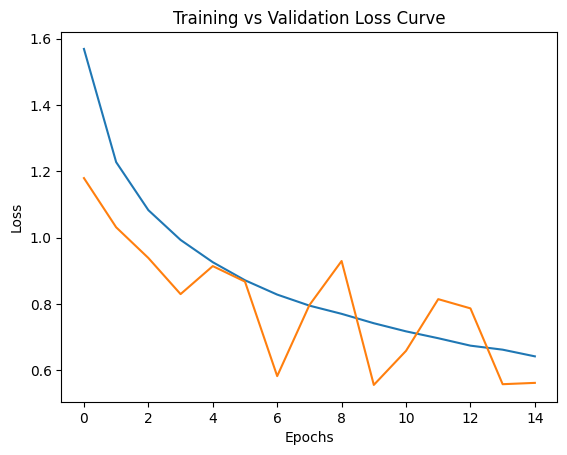

In [21]:
import matplotlib.pyplot as plt

# Plot the training & validation loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Curve')
plt.show()

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get all the true labels and predictions
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'test_loader' is not defined

In [5]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)

        # Block 2
        # Convolutional Layer Block 2
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop2 = nn.Dropout(0.3)

        # Block 3
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop3 = nn.Dropout(0.4)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
         # Block 1
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)

        # Block 2
        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.pool2(torch.relu(self.bn4(self.conv4(x))))
        x = self.drop2(x)

        # Block 3
        x = torch.relu(self.bn5(self.conv5(x)))
        x = self.pool3(torch.relu(self.bn6(self.conv6(x))))
        x = self.drop3(x)

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [6]:
# Define transforms for preprocessing the data (normalizing pixel values between 0 and 1)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the full training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get the indices for train and validation sets
train_indices, val_indices = train_test_split(list(range(len(train_dataset))), test_size=0.2, random_state=42)

# Create Subsets for training and validation sets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create data loaders for the training and validation sets
train_loader = DataLoader(dataset=train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_subset, batch_size=64, shuffle=False)

# Load the test dataset (no split needed here)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
model = CNN()

In [8]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [7]:
epochs = 50
train_losses = []
val_losses = []

device = torch.device('cuda')
model.to(device)

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        pred = model(images)
        loss_fn = loss(pred, labels)

        # Backward pass and optimization
        loss_fn.backward()
        optimizer.step()

        running_loss += loss_fn.item()

    # Compute average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop (no gradient calculation)
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for validation
        for val_images, val_labels in val_loader:
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)


            # Forward pass (no backpropagation)
            val_pred = model(val_images)
            val_loss_fn = loss(val_pred, val_labels)

            val_running_loss += val_loss_fn.item()

    # Compute average validation loss for the epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print the average training and validation loss after each epoch
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

Epoch 1/50, Training Loss: 1.5847, Validation Loss: 1.3733
Epoch 2/50, Training Loss: 1.2146, Validation Loss: 1.0549
Epoch 3/50, Training Loss: 1.0659, Validation Loss: 1.0161
Epoch 4/50, Training Loss: 0.9680, Validation Loss: 0.8170
Epoch 5/50, Training Loss: 0.8929, Validation Loss: 0.7868
Epoch 6/50, Training Loss: 0.8387, Validation Loss: 0.7232
Epoch 7/50, Training Loss: 0.8008, Validation Loss: 0.8314
Epoch 8/50, Training Loss: 0.7668, Validation Loss: 0.7436
Epoch 9/50, Training Loss: 0.7427, Validation Loss: 0.6903
Epoch 10/50, Training Loss: 0.7121, Validation Loss: 0.6527
Epoch 11/50, Training Loss: 0.6833, Validation Loss: 0.5885
Epoch 12/50, Training Loss: 0.6693, Validation Loss: 0.5607
Epoch 13/50, Training Loss: 0.6421, Validation Loss: 0.5828
Epoch 14/50, Training Loss: 0.6305, Validation Loss: 0.5552
Epoch 15/50, Training Loss: 0.6069, Validation Loss: 0.5478
Epoch 16/50, Training Loss: 0.5981, Validation Loss: 0.5486
Epoch 17/50, Training Loss: 0.5867, Validation Lo

In [8]:
correct = 0
total = 0

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        pred = model(images)
        _, predicted = torch.max(pred, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 86.90%


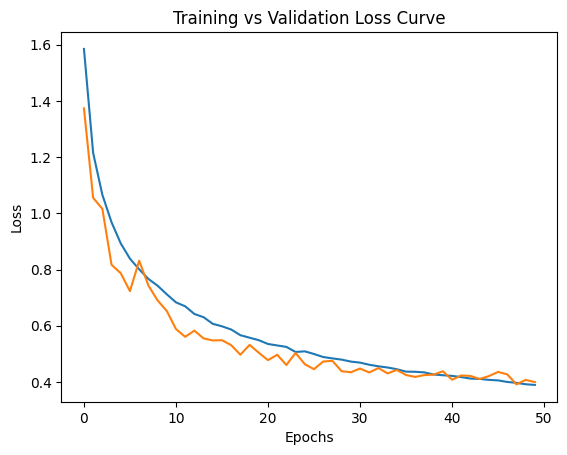

In [9]:
import matplotlib.pyplot as plt

# Plot the training & validation loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Curve')
plt.show()

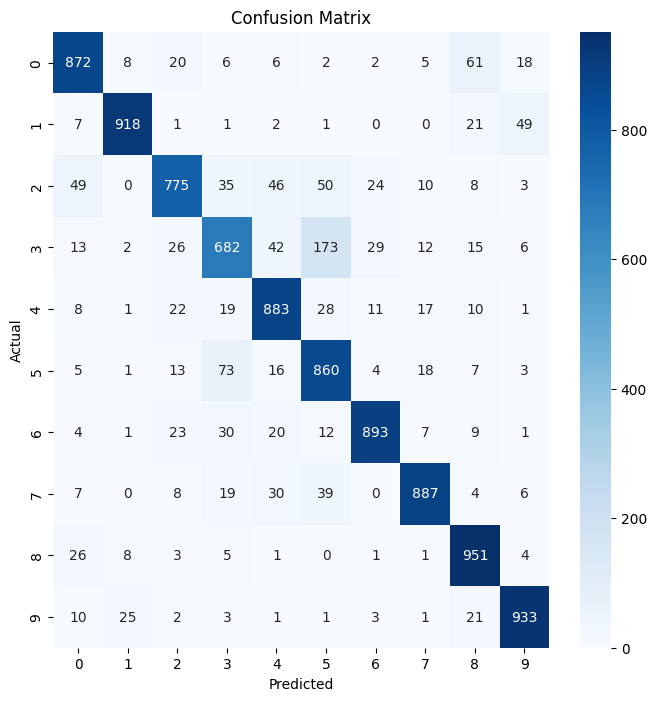

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get all the true labels and predictions
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
torch.save(model.state_dict(), 'models/model.pth')

In [10]:
model.load_state_dict(torch.load('models/model.pth'))
model.eval()  # Set the model to evaluation mode

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.3, inplace=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

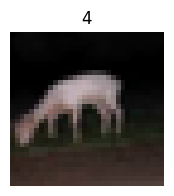

In [25]:
rand_image = np.random.randint(0, 2000)

figure = plt.figure(figsize=(4, 2))

image, label = train_dataset[rand_image]

image = image * 0.5 + 0.5  # Reverse the normalization (0.5 mean, 0.5 std)
    
plt.imshow(image.permute(1, 2, 0)) 
plt.title(label)
plt.axis("off")
plt.show()
    
# Convert from Tensor to NumPy and transpose the channels (C, H, W) -> (H, W, C)
 # For RGB images, no need to use cmap="gray"

In [105]:
import torch.nn.functional as F

# Load the image and convert to RGB if it's grayscale
image = Image.open('data/car1.jpg')

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.Resize((32, 32)),       # Resize the image to 32x32 if needed
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Same normalization as during training
])

# Apply transformations
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension (1, C, H, W)

# Move the model and image to the same device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
image = image.to(device)

# Predict the category
with torch.no_grad():  # Disable gradient calculation for inference
    output = model(image)  # Forward pass
    _, predicted = torch.max(output, 1)  # Get the class index with the highest score

# CIFAR-10 class names
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Output the predicted class name
predicted_class = class_names[predicted.item()]
print(f'Predicted class: {predicted_class}')

Predicted class: car
